In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2
import sklearn
from sklearn.decomposition import PCA

In [2]:
data_path = './data/img_align_celeba'
img_paths = [os.path.join(data_path, p) for p in os.listdir(data_path)]
#img_paths = np.array(img_paths)
print(len(img_paths))

202599


(218, 178, 3)


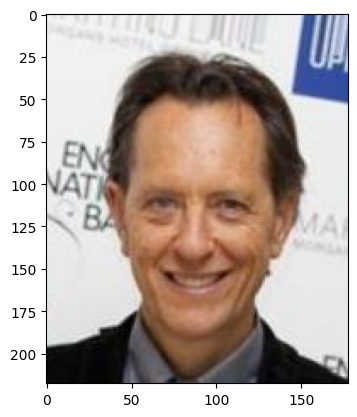

In [3]:
test_path = img_paths[0]
test_img = cv2.imread(test_path)
test_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)
#print(test_img)
print(test_img.shape)
plt.imshow(test_img)

In [11]:
numImgs = 1000
numComps = 20
imgs = [cv2.imread(path) for path in img_paths[:numImgs]]
imgs = [cv2.cvtColor(img, cv2.COLOR_BGR2RGB) for img in imgs]
imgs = np.array(imgs)
print(imgs.shape)
h = imgs.shape[1]
w = imgs.shape[2]
d = imgs.shape[3]
dims = (h,w,d)

(1000, 218, 178, 3)


In [32]:
def print_stats(x):
    print(f"shape={x.shape}, mean={np.mean(x)}, std={np.std(x)}, min={np.min(x)}, max={np.max(x)}")

#center image about 0
class ImgProcessor:

    def __init__(self):
        pass
        
    def preprocess(self,img):
        imgFloat = img.astype(np.float32)
        self.mean = np.mean(imgFloat, axis=0)
        self.std = np.std(imgFloat, axis=0)
        centered = imgFloat-self.mean
        self.numImgs = img.shape[0]
        self.h = img.shape[1]
        self.w = img.shape[2]
        self.d = img.shape[3]
        self.dims=(h, w, d)
        X = np.reshape(centered, (numImgs, h*w*d))
        return X

    #TODO: git rid of?
    def _postprocess(self, img):
        print("post process")
        img = np.reshape(img, self.dims)
        print(self.dims)
        print("shape:", img.shape)
        img = img+self.mean
        img = np.clip(img, 0, 255)
        return img.astype(np.uint8)

    def _postprocess_multiple(self, imgs):
        print("post process multi")
        imgs = np.reshape(imgs, (imgs.shape[0],)+self.dims)
        print(self.dims)
        print("shape:", imgs.shape)
        imgs = (imgs+1)*255/2
        imgs = np.clip(imgs, 0, 255).astype(np.uint8)
        return imgs

    def postprocess(self, imgs):
        if len(imgs.shape) == 1:
            return self._postprocess(imgs)
        else:
            print("multiple")
            return(self._postprocess_multiple(imgs))
    

In [33]:
Proc = ImgProcessor()
X = Proc.preprocess(imgs)
print(X)

[[  97.627       101.823       106.5        ...  -90.042
   -74.378       -69.014     ]
 [-115.373       -92.177       -85.5        ...  139.95801
   152.62201     156.986     ]
 [  97.627        79.823        45.5        ...  -21.042
   -24.377998      0.98600006]
 ...
 [-117.373      -113.177      -112.5        ...   38.958
   -79.378       -62.014     ]
 [-124.373      -120.177      -117.5        ...  -39.042
   -71.378       -39.014     ]
 [  -5.373001    -32.177002    -34.5        ...  -11.042
   -21.377998    -49.014     ]]


In [34]:
pca = PCA(n_components=numComps, random_state=0)
pca.fit(X)

PCA(n_components=20, random_state=0)

Normalization factor from image size:  38849.42
0
component
shape=(116412,), mean=0.0023915907368063927, std=0.0016942474758252501, min=-7.93489525676705e-05, max=0.005003596190363169
val:  454625.62
post process
(218, 178, 3)
shape: (218, 178, 3)
(218, 178, 3)
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[175 163 155]
  [173 161 153]
  [172 160 152]
  ...
  [169 158 149]
  [169 158 149]
  [171 161 151]]

 [[173 161 153]
  [172 161 152]
  [171 159 151]
  ...
  [166 155 146]
  [167 156 147]
  [167 157 148]]

 [[171 160 151]
  [170 159 150]
  [169 158 149]
  ...
  [165 154 144]
  [165 155 146]
  [166 155 146]]]


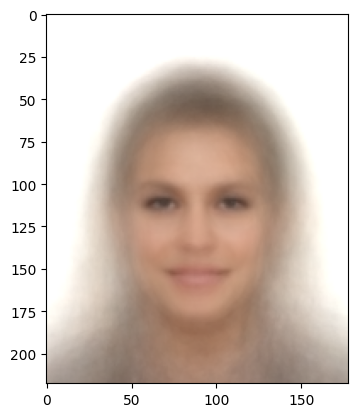

1
component
shape=(116412,), mean=-0.0013169909361749887, std=0.002618341939523816, min=-0.006181417964398861, max=0.0036209123209118843
val:  211627.02
post process
(218, 178, 3)
shape: (218, 178, 3)
(218, 178, 3)
[[[247 241 242]
  [246 241 242]
  [242 237 238]
  ...
  [240 247 250]
  [240 247 250]
  [241 247 250]]

 [[246 241 242]
  [246 241 242]
  [241 237 238]
  ...
  [240 248 250]
  [241 247 250]
  [241 247 250]]

 [[248 243 244]
  [247 242 243]
  [242 238 239]
  ...
  [240 247 249]
  [240 247 249]
  [241 247 250]]

 ...

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]]


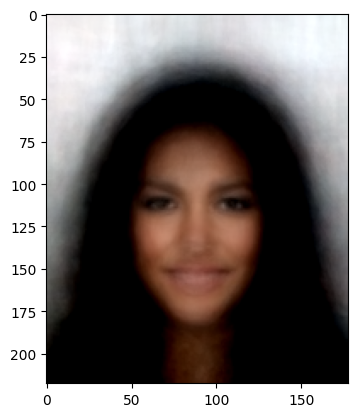

2
component
shape=(116412,), mean=7.145159906940535e-05, std=0.002930029993876815, min=-0.005837493110448122, max=0.005229294300079346
val:  192372.39
post process
(218, 178, 3)
shape: (218, 178, 3)
(218, 178, 3)
[[[179 176 174]
  [180 177 175]
  [182 180 178]
  ...
  [ 68  68  68]
  [ 68  68  67]
  [ 67  68  66]]

 [[181 178 176]
  [180 177 175]
  [182 179 177]
  ...
  [ 67  68  67]
  [ 68  68  67]
  [ 67  68  66]]

 [[182 179 177]
  [182 178 176]
  [182 179 177]
  ...
  [ 68  68  68]
  [ 68  68  67]
  [ 66  67  66]]

 ...

 [[243 248 235]
  [245 249 237]
  [243 247 234]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[243 248 235]
  [243 247 235]
  [244 248 235]
  ...
  [  0   0   0]
  [  0   0   0]
  [  5   4   0]]

 [[241 246 233]
  [241 246 234]
  [242 247 234]
  ...
  [  0   0   0]
  [  3   2   0]
  [  7   7   0]]]


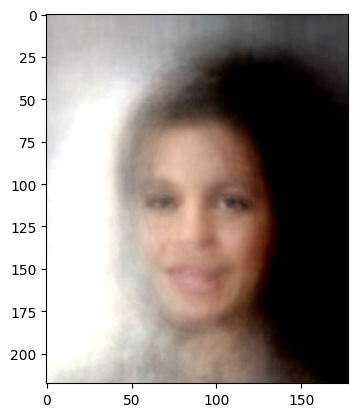

3
component
shape=(116412,), mean=-0.00041323871118947864, std=0.002901623258367181, min=-0.007784984540194273, max=0.005220786668360233
val:  156917.77
post process
(218, 178, 3)
shape: (218, 178, 3)
(218, 178, 3)
[[[158 161 164]
  [158 161 163]
  [159 161 163]
  ...
  [137 140 144]
  [138 140 143]
  [137 139 142]]

 [[157 160 162]
  [158 160 163]
  [158 161 163]
  ...
  [138 141 144]
  [137 140 142]
  [136 139 141]]

 [[157 160 162]
  [157 159 162]
  [159 161 163]
  ...
  [139 142 145]
  [138 140 143]
  [137 139 141]]

 ...

 [[241 228 214]
  [243 230 216]
  [240 226 213]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[237 223 209]
  [240 226 212]
  [239 224 210]
  ...
  [255 255 253]
  [255 255 255]
  [255 255 255]]

 [[231 217 202]
  [234 219 205]
  [234 218 204]
  ...
  [255 255 249]
  [255 255 254]
  [255 255 255]]]


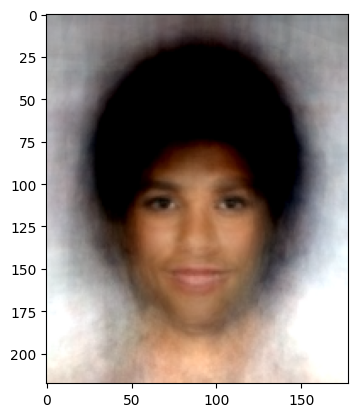

4
component
shape=(116412,), mean=-0.0008663720218464732, std=0.002799925860017538, min=-0.008339961990714073, max=0.004541493020951748
val:  141081.3
post process
(218, 178, 3)
shape: (218, 178, 3)
(218, 178, 3)
[[[ 35  47  53]
  [ 31  43  49]
  [ 28  40  46]
  ...
  [ 37  47  61]
  [ 36  46  60]
  [ 40  50  64]]

 [[ 36  48  54]
  [ 31  43  49]
  [ 29  41  47]
  ...
  [ 36  46  60]
  [ 36  46  60]
  [ 39  50  63]]

 [[ 35  48  53]
  [ 32  45  50]
  [ 30  42  48]
  ...
  [ 38  48  62]
  [ 39  49  63]
  [ 42  52  66]]

 ...

 [[153 154 163]
  [159 159 168]
  [163 163 173]
  ...
  [117 128 135]
  [115 123 132]
  [114 122 131]]

 [[152 153 162]
  [160 160 169]
  [166 166 175]
  ...
  [115 126 133]
  [113 122 132]
  [108 117 126]]

 [[150 151 160]
  [159 159 168]
  [164 164 173]
  ...
  [114 124 132]
  [113 122 131]
  [108 117 126]]]


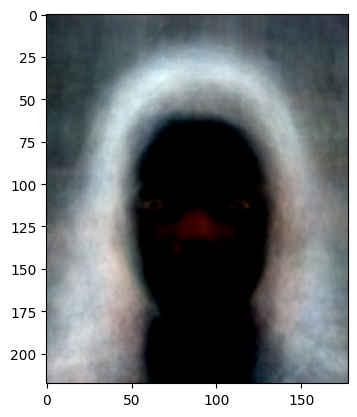

5
component
shape=(116412,), mean=0.0001757406716933474, std=0.002925627864897251, min=-0.007002097088843584, max=0.009103280492126942
val:  128088.54
post process
(218, 178, 3)
shape: (218, 178, 3)
(218, 178, 3)
[[[122 117 118]
  [121 116 117]
  [122 117 118]
  ...
  [230 238 240]
  [228 234 237]
  [228 235 237]]

 [[124 119 120]
  [121 116 117]
  [124 119 120]
  ...
  [230 238 240]
  [227 234 237]
  [228 234 237]]

 [[120 115 117]
  [120 115 117]
  [125 121 122]
  ...
  [231 239 241]
  [228 235 237]
  [228 235 238]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [247 227 213]
  [250 229 215]
  [250 229 214]]

 [[255 255 253]
  [255 255 255]
  [255 255 255]
  ...
  [250 230 216]
  [251 231 217]
  [253 232 217]]

 [[255 255 254]
  [255 255 255]
  [255 255 255]
  ...
  [249 229 215]
  [252 232 217]
  [254 233 219]]]


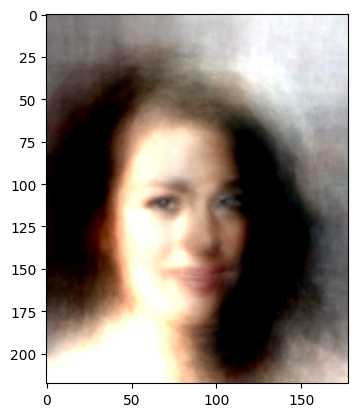

6
component
shape=(116412,), mean=-4.61167364846915e-05, std=0.0029305382631719112, min=-0.009908330626785755, max=0.0069942171685397625
val:  125673.24
post process
(218, 178, 3)
shape: (218, 178, 3)
(218, 178, 3)
[[[ 0  0 11]
  [ 0  0 14]
  [ 0  0 13]
  ...
  [39 45 67]
  [40 46 67]
  [43 49 69]]

 [[ 0  0 13]
  [ 0  1 15]
  [ 0  0 14]
  ...
  [41 47 68]
  [42 48 68]
  [44 50 70]]

 [[ 0  0 13]
  [ 0  1 16]
  [ 0  2 16]
  ...
  [44 50 70]
  [42 48 67]
  [44 50 69]]

 ...

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]]


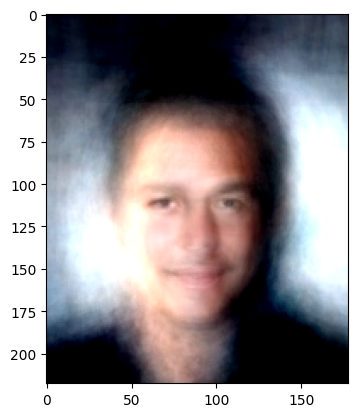

7
component
shape=(116412,), mean=-0.00013010698603466153, std=0.0029280120506882668, min=-0.00661895889788866, max=0.006756012327969074
val:  110302.31
post process
(218, 178, 3)
shape: (218, 178, 3)
(218, 178, 3)
[[[255  47   0]
  [255  48   0]
  [255  45   0]
  ...
  [255  81   0]
  [255  84   0]
  [255  87   0]]

 [[255  46   0]
  [255  47   0]
  [255  44   0]
  ...
  [255  81   0]
  [255  84   0]
  [255  87   0]]

 [[255  46   0]
  [255  47   0]
  [255  45   0]
  ...
  [255  83   0]
  [255  86   0]
  [255  89   0]]

 ...

 [[220 101   9]
  [217  99   7]
  [219 101   9]
  ...
  [248  94   0]
  [245  89   0]
  [242  86   0]]

 [[216  98   6]
  [217  99   6]
  [219 102   9]
  ...
  [241  86   0]
  [246  90   0]
  [245  89   0]]

 [[222 105  13]
  [224 107  13]
  [225 109  16]
  ...
  [244  89   0]
  [247  90   0]
  [246  90   0]]]


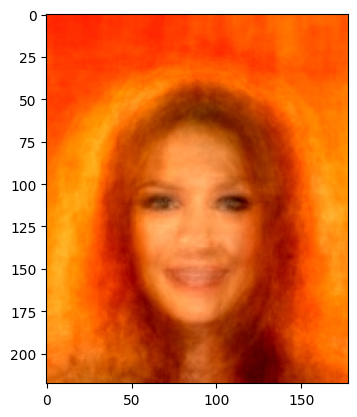

8
component
shape=(116412,), mean=0.00012932351091876626, std=0.002928046276792884, min=-0.007266448810696602, max=0.006703902035951614
val:  101814.68
post process
(218, 178, 3)
shape: (218, 178, 3)
(218, 178, 3)
[[[ 50  86 146]
  [ 46  82 143]
  [ 48  84 144]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[ 51  87 147]
  [ 45  81 142]
  [ 50  86 146]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[ 52  88 149]
  [ 48  84 145]
  [ 51  87 148]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 ...

 [[255 233 222]
  [255 231 220]
  [255 236 225]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 230 219]
  [255 241 229]
  [255 239 227]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 234 223]
  [255 247 234]
  [255 247 235]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]


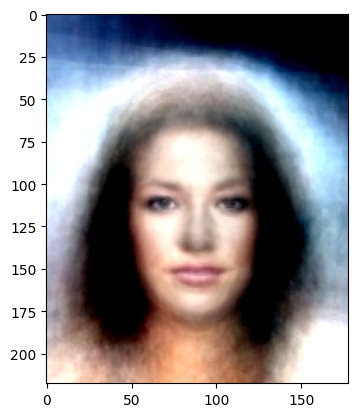

9
component
shape=(116412,), mean=2.445802056172397e-05, std=0.002930799499154091, min=-0.007503057364374399, max=0.0075397007167339325
val:  94942.69
post process
(218, 178, 3)
shape: (218, 178, 3)
(218, 178, 3)
[[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [130 138 149]
  [128 135 146]
  [125 132 144]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [137 145 155]
  [132 139 150]
  [128 135 147]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [140 148 158]
  [133 141 151]
  [130 137 148]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]]


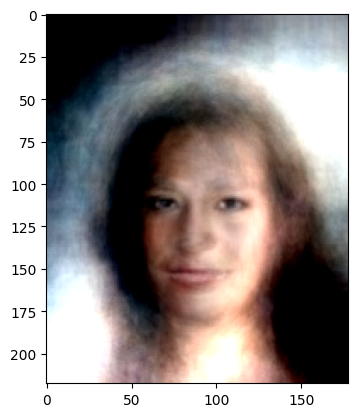

10
component
shape=(116412,), mean=6.472937820944935e-05, std=0.002930187154561281, min=-0.00821033213287592, max=0.00800540391355753
val:  91365.98
post process
(218, 178, 3)
shape: (218, 178, 3)
(218, 178, 3)
[[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [135 105  82]
  [135 105  82]
  [134 104  80]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [134 104  81]
  [134 104  81]
  [133 103  80]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [134 105  81]
  [135 106  83]
  [134 105  81]]

 ...

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [140 148 151]
  [141 147 151]
  [144 149 153]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [150 158 162]
  [142 150 153]
  [149 156 159]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [149 158 161]
  [147 155 158]
  [153 161 164]]]


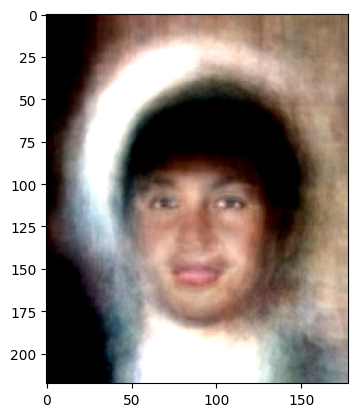

11
component
shape=(116412,), mean=0.00012230790161993355, std=0.0029283484909683466, min=-0.010186968371272087, max=0.008157948963344097
val:  85182.95
post process
(218, 178, 3)
shape: (218, 178, 3)
(218, 178, 3)
[[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [234 255 255]
  [238 255 255]
  [236 255 255]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [231 255 255]
  [237 255 255]
  [236 255 255]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [226 255 255]
  [235 255 255]
  [234 255 255]]

 ...

 [[198 207 195]
  [195 206 193]
  [190 201 188]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[193 202 188]
  [191 201 187]
  [187 196 182]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[190 199 185]
  [187 196 181]
  [181 190 175]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]


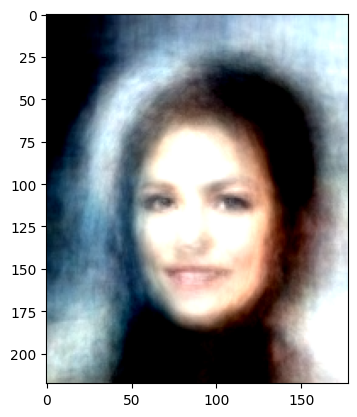

12
component
shape=(116412,), mean=9.243188105756417e-05, std=0.0029294437263160944, min=-0.00810400489717722, max=0.008638814091682434
val:  83203.7
post process
(218, 178, 3)
shape: (218, 178, 3)
(218, 178, 3)
[[[164 133 107]
  [166 136 109]
  [167 138 111]
  ...
  [ 27   1   0]
  [ 28   0   0]
  [ 27   0   0]]

 [[164 134 107]
  [167 137 110]
  [168 138 112]
  ...
  [ 24   0   0]
  [ 22   0   0]
  [ 22   0   0]]

 [[167 136 110]
  [169 139 112]
  [169 139 113]
  ...
  [ 21   0   0]
  [ 17   0   0]
  [ 17   0   0]]

 ...

 [[ 96 116 135]
  [ 92 113 131]
  [ 94 114 133]
  ...
  [  0   0  27]
  [  0   0  24]
  [  0   0  30]]

 [[ 95 117 136]
  [ 89 111 129]
  [ 88 109 129]
  ...
  [  0   0  22]
  [  0   0  24]
  [  0   0  22]]

 [[ 97 120 139]
  [ 93 116 134]
  [ 93 116 135]
  ...
  [  0   0  15]
  [  0   0  17]
  [  0   0  16]]]


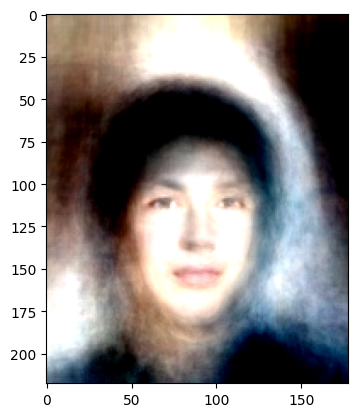

13
component
shape=(116412,), mean=7.890882329775195e-07, std=0.0029309000819921494, min=-0.008649096824228764, max=0.01045383233577013
val:  75034.06
post process
(218, 178, 3)
shape: (218, 178, 3)
(218, 178, 3)
[[[117 130  83]
  [121 133  86]
  [122 132  86]
  ...
  [135 139 110]
  [127 129 102]
  [134 136 110]]

 [[119 131  85]
  [121 133  86]
  [121 132  86]
  ...
  [138 142 113]
  [135 138 110]
  [143 145 119]]

 [[114 127  81]
  [118 130  84]
  [120 130  85]
  ...
  [139 143 114]
  [139 142 114]
  [146 148 122]]

 ...

 [[ 29  28  17]
  [ 22  22  10]
  [ 19  19   8]
  ...
  [157 154 151]
  [141 139 136]
  [134 132 130]]

 [[ 26  23  12]
  [ 21  20   8]
  [ 22  21  10]
  ...
  [154 151 150]
  [142 140 139]
  [136 136 135]]

 [[ 32  30  18]
  [ 25  23  11]
  [ 23  21  10]
  ...
  [153 151 150]
  [145 144 143]
  [139 139 138]]]


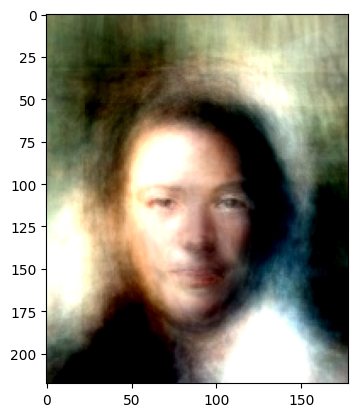

14
component
shape=(116412,), mean=0.00014610662765335292, std=0.00292725651524961, min=-0.011881952174007893, max=0.006325715221464634
val:  71957.62
post process
(218, 178, 3)
shape: (218, 178, 3)
(218, 178, 3)
[[[167 184 186]
  [170 187 188]
  [177 193 193]
  ...
  [239 255 255]
  [233 249 253]
  [233 248 252]]

 [[168 186 187]
  [170 187 188]
  [178 195 194]
  ...
  [242 255 255]
  [235 250 254]
  [234 250 253]]

 [[173 191 192]
  [173 191 191]
  [181 198 196]
  ...
  [247 255 255]
  [238 253 255]
  [237 252 255]]

 ...

 [[196 141 137]
  [197 141 137]
  [209 149 144]
  ...
  [255 255 246]
  [255 255 241]
  [255 255 246]]

 [[198 146 142]
  [203 149 144]
  [209 151 146]
  ...
  [255 255 245]
  [255 255 237]
  [255 255 248]]

 [[204 153 148]
  [210 158 152]
  [215 158 153]
  ...
  [255 255 242]
  [255 255 239]
  [255 255 250]]]


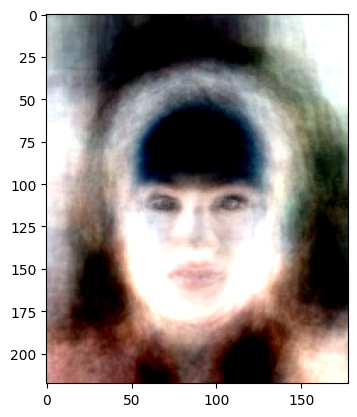

15
component
shape=(116412,), mean=6.498612492578104e-05, std=0.002930179936811328, min=-0.009880670346319675, max=0.006315313745290041
val:  67941.58
post process
(218, 178, 3)
shape: (218, 178, 3)
(218, 178, 3)
[[[124 101  90]
  [127 104  93]
  [125 101  89]
  ...
  [ 51  43  14]
  [ 58  51  21]
  [ 64  56  26]]

 [[123  99  88]
  [125 102  91]
  [123  99  87]
  ...
  [ 49  40  12]
  [ 58  51  20]
  [ 64  56  26]]

 [[125 101  91]
  [130 106  96]
  [125 101  90]
  ...
  [ 46  37   8]
  [ 56  48  18]
  [ 62  54  25]]

 ...

 [[108  39   1]
  [107  39   0]
  [103  36   1]
  ...
  [ 85  76  94]
  [ 86  76  93]
  [ 83  73  90]]

 [[114  44   6]
  [120  52  14]
  [112  46   9]
  ...
  [ 94  86 102]
  [ 79  70  87]
  [ 83  74  90]]

 [[123  53  15]
  [127  59  21]
  [120  54  17]
  ...
  [ 92  85 102]
  [ 84  76  91]
  [ 87  79  94]]]


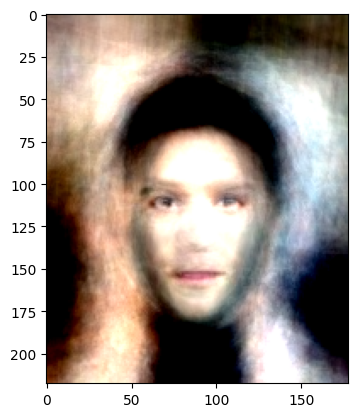

16
component
shape=(116412,), mean=8.214236731873825e-05, std=0.0029297503642737865, min=-0.009693467989563942, max=0.009922427125275135
val:  65661.09
post process
(218, 178, 3)
shape: (218, 178, 3)
(218, 178, 3)
[[[237 234 216]
  [234 231 212]
  [237 231 212]
  ...
  [157 160 161]
  [155 157 158]
  [153 155 156]]

 [[236 235 217]
  [236 232 214]
  [236 231 212]
  ...
  [155 158 159]
  [154 155 156]
  [153 154 154]]

 [[232 232 214]
  [232 231 213]
  [235 232 213]
  ...
  [156 158 159]
  [155 156 157]
  [154 155 156]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [162 101  86]
  [162  99  84]
  [165 102  88]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [160  98  83]
  [169 105  89]
  [167 103  88]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [162  99  84]
  [165 101  85]
  [163  99  83]]]


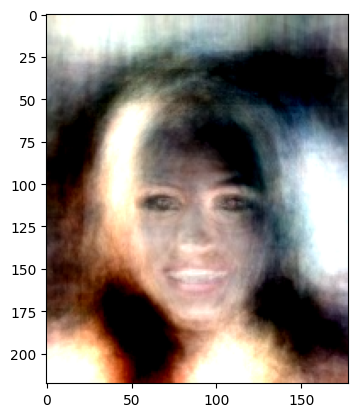

17
component
shape=(116412,), mean=6.480328011093661e-05, std=0.0029301841277629137, min=-0.009116461500525475, max=0.006789837963879108
val:  62600.77
post process
(218, 178, 3)
shape: (218, 178, 3)
(218, 178, 3)
[[[131 102  92]
  [127  99  89]
  [126  99  89]
  ...
  [ 45  17   0]
  [ 49  20   0]
  [ 49  19   0]]

 [[134 106  95]
  [128 101  90]
  [127 100  90]
  ...
  [ 41  13   0]
  [ 46  16   0]
  [ 45  16   0]]

 [[133 106  96]
  [129 102  92]
  [126 100  90]
  ...
  [ 39  12   0]
  [ 44  15   0]
  [ 43  14   0]]

 ...

 [[ 53  46  40]
  [ 46  39  33]
  [ 40  33  29]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[ 32  23  17]
  [ 28  20  14]
  [ 25  17  13]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[ 18   9   2]
  [ 18   8   2]
  [ 16   6   2]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]]


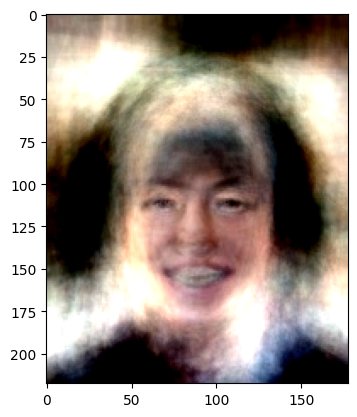

18
component
shape=(116412,), mean=-3.0460463676718064e-05, std=0.002930742222815752, min=-0.008887500502169132, max=0.010450959205627441
val:  59658.355
post process
(218, 178, 3)
shape: (218, 178, 3)
(218, 178, 3)
[[[ 78 191 240]
  [ 82 195 243]
  [ 80 191 238]
  ...
  [  8 105 151]
  [  5 103 148]
  [ 11 109 153]]

 [[ 75 189 237]
  [ 81 194 242]
  [ 85 196 243]
  ...
  [  8 105 152]
  [  7 105 150]
  [ 12 110 154]]

 [[ 78 192 239]
  [ 82 196 243]
  [ 85 197 243]
  ...
  [  7 104 151]
  [  7 104 150]
  [ 10 108 153]]

 ...

 [[ 22   0   0]
  [ 19   0   0]
  [ 19   0   0]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[ 19   0   0]
  [ 20   0   0]
  [ 37   0   0]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[ 27   0   0]
  [ 26   0   0]
  [ 41   0   0]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]


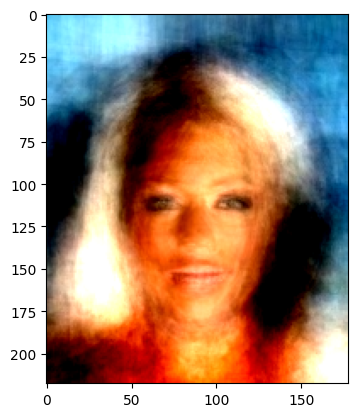

19
component
shape=(116412,), mean=1.6858279195730574e-05, std=0.002930852584540844, min=-0.010767033323645592, max=0.009465966373682022
val:  58720.52
post process
(218, 178, 3)
shape: (218, 178, 3)
(218, 178, 3)
[[[229 153  46]
  [237 160  52]
  [234 157  48]
  ...
  [ 20   0   0]
  [ 20   0   0]
  [ 25   0   0]]

 [[227 151  44]
  [238 161  54]
  [237 160  51]
  ...
  [ 20   0   0]
  [ 23   0   0]
  [ 28   0   0]]

 [[234 160  51]
  [239 164  55]
  [233 158  48]
  ...
  [ 19   0   0]
  [ 23   0   0]
  [ 27   0   0]]

 ...

 [[ 55 126 153]
  [ 53 123 150]
  [ 50 119 143]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[ 59 128 159]
  [ 57 127 155]
  [ 55 123 149]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[ 64 133 164]
  [ 65 134 164]
  [ 63 130 157]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]


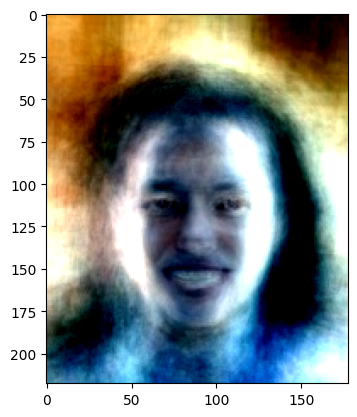

In [35]:
#maybe use norm(np.repeat(127, h*w*d))?
normFactor = np.linalg.norm(Proc.mean)
print("Normalization factor from image size: ", normFactor)
for c in range(numComps):
    print(c)
    component = pca.components_[c]
    value = pca.singular_values_[c]
    print("component")
    print_stats(component)
    print("val: ", value)
    compProcessed = Proc.postprocess(component*normFactor)
    print(compProcessed.shape)
    print(compProcessed)
    plt.imshow(compProcessed)
    plt.show()



[[2048.442    2168.3103   2176.2896   ...  622.26904   662.13184
   631.69916 ]
 [ 668.25385   663.44714   683.5483   ... -748.34814  -714.6705
  -698.31274 ]
 [ 275.20996   280.82397   283.78995  ... -520.6004   -455.0549
  -467.70047 ]
 ...
 [  10.861833  -27.926033  -39.795895 ... -366.1388   -352.16397
  -295.746   ]
 [ -70.55642   110.12709   189.4297   ...  604.48004   425.50607
   327.30603 ]
 [ 159.01433    50.258133 -107.2671   ...  234.10516   417.2143
   531.5513  ]]
post process
(218, 178, 3)
shape: (218, 178, 3)


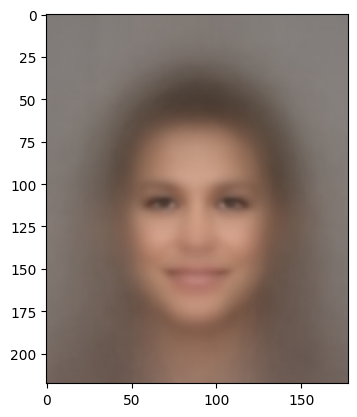

In [36]:
scaled_components = pca.components_*pca.singular_values_[:, np.newaxis]
print(scaled_components)
golden = np.sum(scaled_components, axis=0)/numComps
golden = Proc.postprocess(golden/np.sqrt(numImgs))
golden = np.reshape(golden, Proc.dims).astype(np.uint8)
plt.imshow(golden)